In [1]:
# Importing Library 
import warnings
warnings.filterwarnings('ignore')

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models, expected_returns, objective_functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyfolio

In [2]:
tickers = ['SIE', 'DTE', 'ALV', 'MRK', 'DHL']

In [3]:
# Split the Data into Training and Test set
# Set date variable
start_date = '2010-01-04' # Start date of training set
end_date = '2020-10-08' # End date of training set
test_start_date = '2020-10-09' # End date of test set
test_end_date = '2023-06-30' # End date of test set

In [4]:
df1 = pd.read_csv("LSTM_1 feature.csv")
df2 = pd.read_csv("LSTM_2 feature.csv")
df3 = pd.read_csv("LSTM_3 feature.csv")

In [5]:
actual_returns = pd.read_csv("actual_returns.csv", index_col=[0])
actual_test = pd.read_csv("actual_test.csv")

In [6]:
actual_test

,SIE,DTE,ALV,MRK,DHL
0,88.108665,12.722281,172.650269,97.990036,29.719999
1,88.153114,12.755207,170.705826,98.225822,29.760000
2,88.775276,12.941236,173.379425,99.027473,30.315001
3,89.521896,12.929710,173.095856,99.970581,30.395000
4,87.922020,13.040010,174.473190,100.253517,30.520000
...,...,...,...,...,...
942,155.479996,19.695999,209.199997,152.600006,43.000000
943,157.559998,19.906000,211.300003,147.199997,43.500000
944,152.720001,20.030001,211.649994,150.500000,44.305000
945,150.580002,19.930000,211.050003,149.600006,44.195000


In [7]:
actual_returns

,SIE,DTE,ALV,MRK,DHL
Date,,,,,
2020-10-09,0.006496,-0.003806,0.002743,0.004987,0.007566
2020-10-12,0.007888,0.006599,0.010111,0.000000,0.000485
2020-10-13,-0.010673,0.003106,-0.019548,-0.003435,0.004116
2020-10-14,0.010428,-0.004128,0.003003,-0.016852,0.011575
2020-10-15,-0.027224,-0.031434,-0.028619,-0.035450,-0.029559
...,...,...,...,...,...
2023-06-26,-0.009555,0.007056,0.000239,-0.002288,-0.004399
2023-06-27,0.013378,0.010662,0.010038,-0.035387,0.011628
2023-06-28,-0.030718,0.006229,0.001656,0.022418,0.018506


# 1 Base scenario (2 features)

In [8]:
df2.head()

,Date,SIE,DTE,ALV,MRK,DHL,Forecasted
0,2010-01-04,39.892437,4.953136,45.519119,26.576839,13.980,N
1,2010-01-05,39.916805,4.911083,45.657921,26.381214,14.000,N
2,2010-01-06,40.063042,4.789590,46.012665,26.364910,14.155,N
3,2010-01-07,40.538315,4.698472,45.483131,26.919188,14.125,N
4,2010-01-08,40.794235,4.724171,45.236355,26.646120,14.460,N


In [9]:
df2.isna().sum()

Date          0
SIE           0
DTE           0
ALV           0
MRK           0
DHL           0
Forecasted    0
dtype: int64

In [10]:
df2.set_index('Date', inplace=True)
df2

,SIE,DTE,ALV,MRK,DHL,Forecasted
Date,,,,,,
2010-01-04,39.892437,4.953136,45.519119,26.576839,13.980000,N
2010-01-05,39.916805,4.911083,45.657921,26.381214,14.000000,N
2010-01-06,40.063042,4.789590,46.012665,26.364910,14.155000,N
2010-01-07,40.538315,4.698472,45.483131,26.919188,14.125000,N
2010-01-08,40.794235,4.724171,45.236355,26.646120,14.460000,N
...,...,...,...,...,...,...
2023-06-26,161.531769,38.137283,207.506317,156.953033,45.643761,Y
2023-06-27,158.733322,40.614021,206.962631,159.226746,45.401493,Y
2023-06-28,168.029846,40.979473,210.701828,158.331451,45.604198,Y


The forecast-prices-1.csv is included actual prices in train period and forecasted prices in test period.

In [11]:
# Split data set to training set and test set
train = df2.loc[:end_date] # this is actual prices
test = df2.loc[test_start_date:] # this is estimated prices which resulted from ML algorithms

In [12]:
test

,SIE,DTE,ALV,MRK,DHL,Forecasted
Date,,,,,,
2020-10-09,100.183418,13.822453,142.069046,120.284950,38.771660,Y
2020-10-12,98.232193,13.852106,142.224548,119.802170,38.910854,Y
2020-10-13,98.965065,13.725219,141.632248,119.165428,38.949524,Y
2020-10-14,98.185829,13.819102,142.051453,118.930122,38.908836,Y
2020-10-15,98.383385,13.809062,142.683029,119.754181,38.485916,Y
...,...,...,...,...,...,...
2023-06-26,161.531769,38.137283,207.506317,156.953033,45.643761,Y
2023-06-27,158.733322,40.614021,206.962631,159.226746,45.401493,Y
2023-06-28,168.029846,40.979473,210.701828,158.331451,45.604198,Y


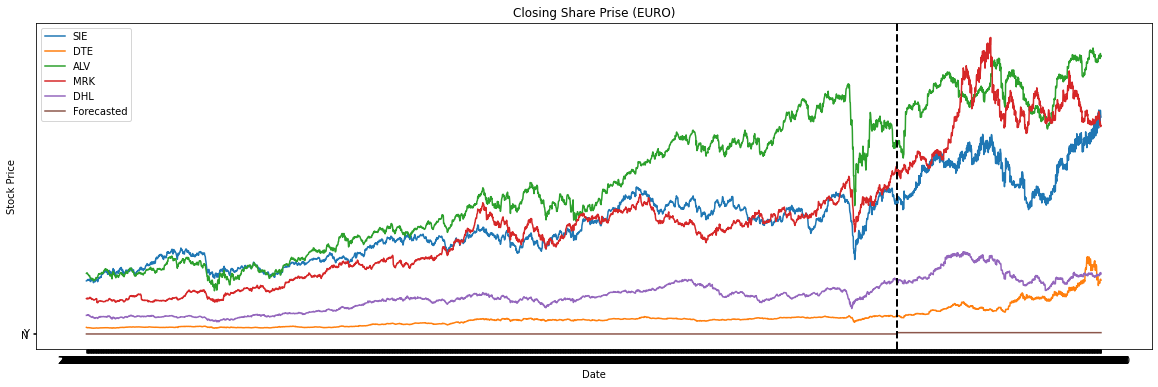

In [13]:
# Plot line chart for each stock
plt.figure(figsize=(20, 6))  # Set the figure size

for column in df2.columns:
    plt.plot(df2.index, df2[column], label=column)

# Add a vertical line at '2020-10-09'
plt.axvline(x='2020-10-09', color='black', linestyle='--', lw=2)

# Configure the plot
plt.title('Closing Share Prise (EURO)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()

# Show the plot
plt.show()

In [14]:
# working days in a year 252
# Prices (include actual and estimated) which is used as input to calculate stock covariance
window = 252
start = len(train)-window
data = df2.iloc[start:]
data = data.reset_index(drop=True)
data = data[['SIE', 'DTE', 'ALV', 'MRK', 'DHL']]

In [15]:
# Forecasted returns which is used as input of optimization algorithm
forecast_returns_df2 = df2[['SIE', 'DTE', 'ALV', 'MRK', 'DHL']].pct_change()
forecast_returns2 = forecast_returns_df2.iloc[start:]
forecast_returns2 = forecast_returns2.reset_index(drop=True)

In [16]:
forecast_returns2

,SIE,DTE,ALV,MRK,DHL
0,0.027360,0.009932,0.028723,0.000482,-0.002648
1,0.000504,0.002588,-0.011262,0.002406,0.002186
2,0.007058,0.014585,0.015662,0.008161,0.000156
3,0.008410,-0.000891,-0.001636,0.009524,-0.004829
4,-0.017871,0.008531,0.007957,0.002830,-0.005949
...,...,...,...,...,...
942,0.006540,-0.008015,-0.005040,-0.046261,0.042451
943,-0.017324,0.064943,-0.002620,0.014487,-0.005308
944,0.058567,0.008998,0.018067,-0.005623,0.004465
945,-0.022372,0.004621,-0.012601,-0.016164,0.011368


## 1.1 Maximize the Sharpe ratio

In [17]:
# Perform Maximum the Sharpe ratio optimization model to calculate weights (Durall, 2022)
portfolio_weights_min_var_2 = np.zeros([test.shape[0], len(tickers)])

idx=0
for i in range(portfolio_weights_min_var_2.shape[0]):    
    sel = data.iloc[i+1:window+i+1]
    
    mu = expected_returns.mean_historical_return(sel)
    S = risk_models.sample_cov(sel)

    # optimize for max sharpe ratio
    ef = EfficientFrontier(mu, S, weight_bounds=(0, 1))
    
    try:
        weights = ef.max_sharpe()
    except:
        weights = ef.nonconvex_objective(
            objective_functions.sharpe_ratio,
            objective_args=(ef.expected_returns, ef.cov_matrix),
            weights_sum_to_one=True)
    weights = ef.clean_weights(cutoff=0.01, rounding=5)
    data.iloc[window+i] = actual_test.iloc[window+i]

    portfolio_weights_min_var_2[idx]=np.array([weights[j] for j in tickers])
    idx +=1

Text(0.5, 0, 'Time (Years-Months)')

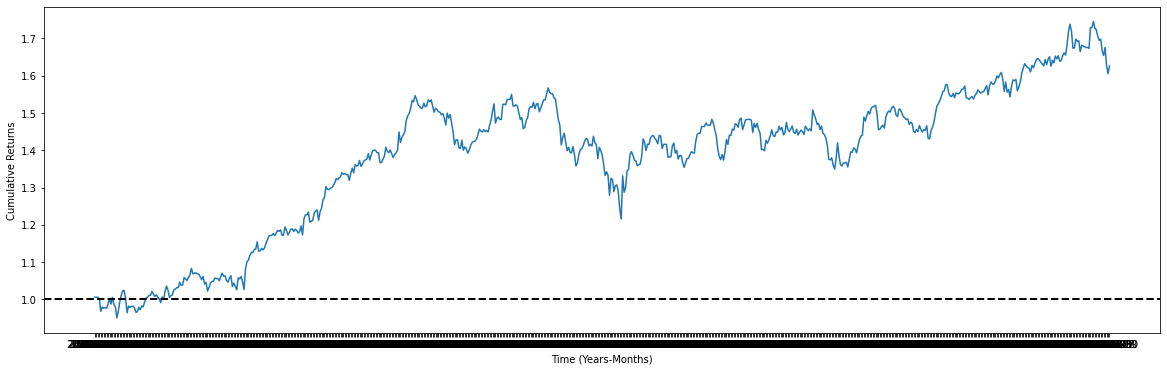

In [18]:
# Calculate porfolio returns from actual returns and resulted weights which is calculated above (Durall, 2022)
return_stocks_min_var_2 = np.sum(actual_returns.multiply(portfolio_weights_min_var_2), axis=1)
cumulative_returns_daily_min_var_2 = (1 + return_stocks_min_var_2).cumprod()
plt.figure(figsize=(20, 6))  # Set the figure size
plt.plot(cumulative_returns_daily_min_var_2)
plt.axhline(1, color='black', linestyle='--', lw=2)
plt.ylabel("Cumulative Returns")
plt.xlabel("Time (Years-Months)")

In [19]:
# Calculate portfolio variance
portfolio_variance_min_var_2 = np.dot(portfolio_weights_min_var_2[-1].T, np.dot(np.cov(actual_returns, rowvar=False), portfolio_weights_min_var_2[-1]))
portfolio_variance_min_var_2

0.0003428396184052693

In [20]:
# Calculate standard deviation
std_min_var_2 = np.sqrt(portfolio_variance_min_var_2)
std_min_var_2

0.018515928775118717

In [21]:
# Calculate porfolio returns
cumulative_returns_daily_min_var_2[-1]

1.6256461294158018

In [22]:
# Check negative weights
np.any(portfolio_weights_min_var_2 < 0)

False

In [23]:
return_stocks_min_var_2.index = pd.to_datetime(return_stocks_min_var_2.index)

Start date,2020-10-09
End date,2023-06-30
Total months,33
,Backtest
Annual return,19.266%
Cumulative returns,62.565%
Annual volatility,19.442%
Sharpe ratio,1.00
Calmar ratio,0.86
Stability,0.70
Max drawdown,-22.442%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,22.44,2021-12-28,2022-03-08,2023-01-16,275
1,9.97,2021-08-20,2021-10-11,2021-11-22,67
2,8.01,2023-06-15,2023-06-29,NaT,NaN
3,5.94,2021-11-22,2021-12-02,2021-12-27,26
4,5.81,2020-11-06,2020-11-10,2020-12-17,30


Stress Events,mean,min,max
New Normal,0.08%,-4.01%,9.54%


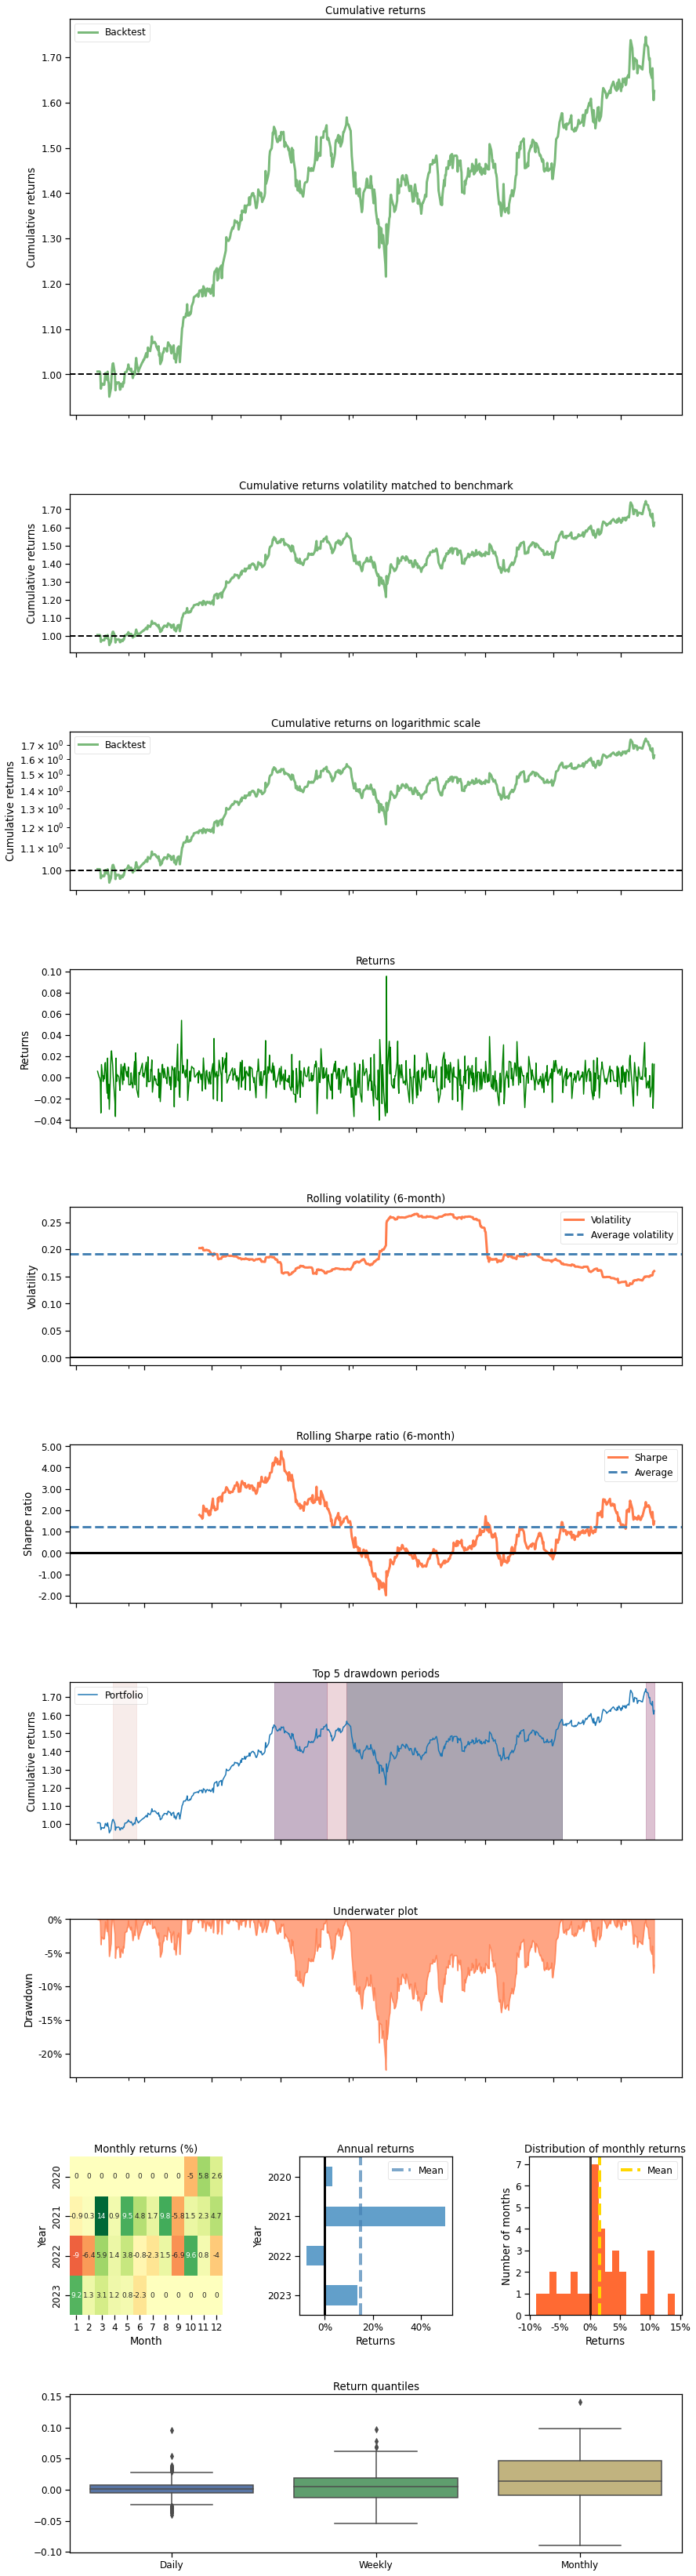

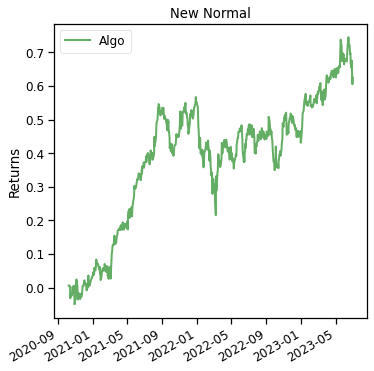

In [24]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = return_stocks_min_var_2, set_context=False)

Text(0.5, 0, 'Time (Years-Months)')

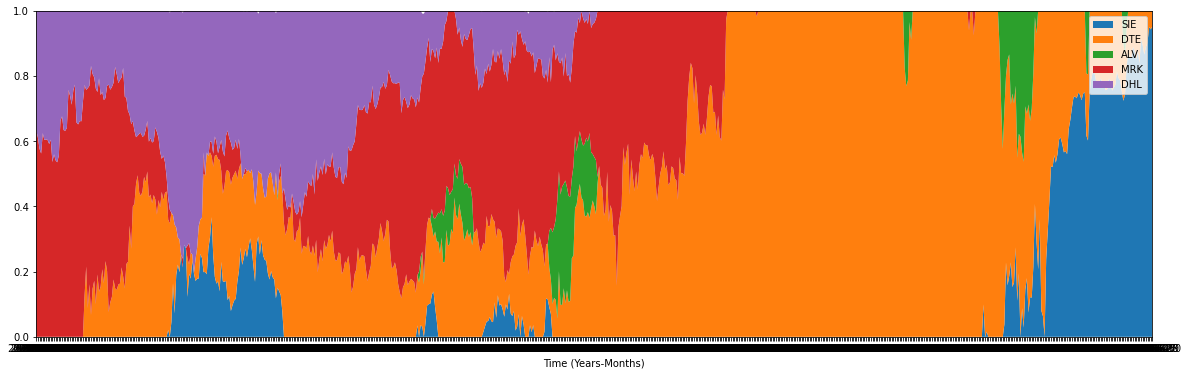

In [25]:
df_plot = pd.DataFrame (portfolio_weights_min_var_2, index = test.index, columns = tickers)
plt.figure(figsize=(20, 6))  # Set the figure size
plt.stackplot(test.index, df_plot['SIE'], df_plot['DTE'], df_plot['ALV'], df_plot['MRK'], df_plot['DHL'], labels=tickers)
plt.legend(loc='upper right')
plt.margins(x=0)
plt.margins(y=0)
plt.xlabel("Time (Years-Months)")

In [26]:
df_plot

,SIE,DTE,ALV,MRK,DHL
Date,,,,,
2020-10-09,0.00000,0.00000,0.0,0.63275,0.36725
2020-10-12,0.00000,0.00000,0.0,0.61041,0.38959
2020-10-13,0.00000,0.00000,0.0,0.57636,0.42364
2020-10-14,0.00000,0.00000,0.0,0.56196,0.43804
2020-10-15,0.00000,0.00000,0.0,0.62444,0.37556
...,...,...,...,...,...
2023-06-26,0.88856,0.11144,0.0,0.00000,0.00000
2023-06-27,0.90158,0.09842,0.0,0.00000,0.00000
2023-06-28,0.94970,0.05030,0.0,0.00000,0.00000


In [27]:
df_plot.to_csv('LSTM_min_var_2.csv', index=True)

## 1.2 Minimize the volatility

In [28]:
# working days in a year 252
# Prices (include actual and estimated) which is used as input to calculate stock covariance
window = 252
start = len(train)-window
data = df2.iloc[start:]
data = data.reset_index(drop=True)
data = data[['SIE', 'DTE', 'ALV', 'MRK', 'DHL']]

In [29]:
data

,SIE,DTE,ALV,MRK,DHL
0,88.108665,12.722281,172.650269,97.990036,32.020000
1,88.153107,12.755207,170.705811,98.225822,32.090000
2,88.775276,12.941236,173.379425,99.027466,32.095001
3,89.521896,12.929710,173.095856,99.970581,31.940001
4,87.922012,13.040010,174.473190,100.253525,31.750000
...,...,...,...,...,...
942,161.531769,38.137283,207.506317,156.953033,45.643761
943,158.733322,40.614021,206.962631,159.226746,45.401493
944,168.029846,40.979473,210.701828,158.331451,45.604198
945,164.270599,41.168839,208.046753,155.772217,46.122608


In [30]:
actual_test

,SIE,DTE,ALV,MRK,DHL
0,88.108665,12.722281,172.650269,97.990036,29.719999
1,88.153114,12.755207,170.705826,98.225822,29.760000
2,88.775276,12.941236,173.379425,99.027473,30.315001
3,89.521896,12.929710,173.095856,99.970581,30.395000
4,87.922020,13.040010,174.473190,100.253517,30.520000
...,...,...,...,...,...
942,155.479996,19.695999,209.199997,152.600006,43.000000
943,157.559998,19.906000,211.300003,147.199997,43.500000
944,152.720001,20.030001,211.649994,150.500000,44.305000
945,150.580002,19.930000,211.050003,149.600006,44.195000


In [31]:
# Perform Minimum variance optimization model to calculate weights (Durall, 2022)
portfolio_weights_min_vol_2 = np.zeros([test.shape[0], len(tickers)])

idx=0
for i in range(portfolio_weights_min_vol_2.shape[0]):    
    sel = data.iloc[i+1:window+i+1]
    
    mu = expected_returns.mean_historical_return(sel)
    S = risk_models.sample_cov(sel)

    # optimize for max sharpe ratio
    ef = EfficientFrontier(mu, S, weight_bounds=(0, 1))
     
    weights = ef.min_volatility()
    weights = ef.clean_weights(cutoff=0.01, rounding=5)
    data.iloc[window+i] = actual_test.iloc[window+i]
   
    portfolio_weights_min_vol_2[idx]=np.array([weights[j] for j in tickers])
    idx +=1

Text(0.5, 0, 'Time (Years-Months)')

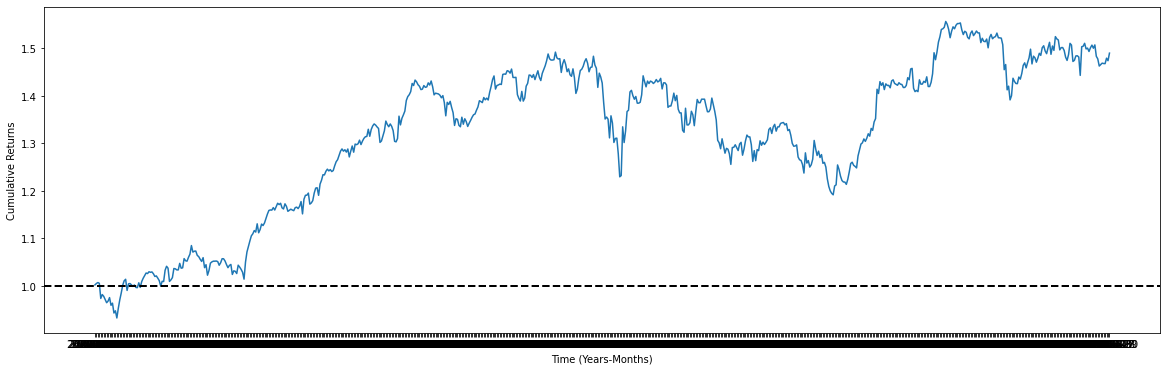

In [32]:
# Calculate porfolio returns from actual returns and resulted weights which is calculated above (Durall, 2022)
return_stocks_min_vol_2 = np.sum(actual_returns.multiply(portfolio_weights_min_vol_2), axis=1)
cumulative_returns_daily_min_vol_2 = (1 + return_stocks_min_vol_2).cumprod()
plt.figure(figsize=(20, 6))  # Set the figure size
plt.plot(cumulative_returns_daily_min_vol_2)
plt.axhline(1, color='black', linestyle='--', lw=2)
plt.ylabel("Cumulative Returns")
plt.xlabel("Time (Years-Months)")

In [33]:
# Calculate portfolio variance
portfolio_variance_min_vol_2 = np.dot(portfolio_weights_min_vol_2[-1].T, np.dot(np.cov(actual_returns, rowvar=False), portfolio_weights_min_vol_2[-1]))
portfolio_variance_min_vol_2

0.00015036724303355521

In [34]:
# Calculate standard deviation
std_min_vol_2 = np.sqrt(portfolio_variance_min_vol_2)
std_min_vol_2

0.012262432182628177

In [35]:
# Calculate porfolio returns
cumulative_returns_daily_min_vol_2[-1]

1.4902111957814197

In [36]:
# Check negative weights
np.any(portfolio_variance_min_vol_2 < 0)

False

In [37]:
return_stocks_min_vol_2.index = pd.to_datetime(return_stocks_min_vol_2.index)

Start date,2020-10-09
End date,2023-06-30
Total months,33
,Backtest
Annual return,15.563%
Cumulative returns,49.021%
Annual volatility,18.267%
Sharpe ratio,0.88
Calmar ratio,0.77
Stability,0.59
Max drawdown,-20.132%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,20.13,2022-01-04,2022-09-29,2023-01-06,264
1,10.61,2023-01-16,2023-03-17,NaT,NaN
2,7.41,2020-10-13,2020-10-30,2020-11-06,19
3,6.86,2021-08-20,2021-10-04,2021-11-03,54
4,6.52,2021-01-14,2021-03-05,2021-03-11,41


Stress Events,mean,min,max
New Normal,0.06%,-3.78%,8.33%


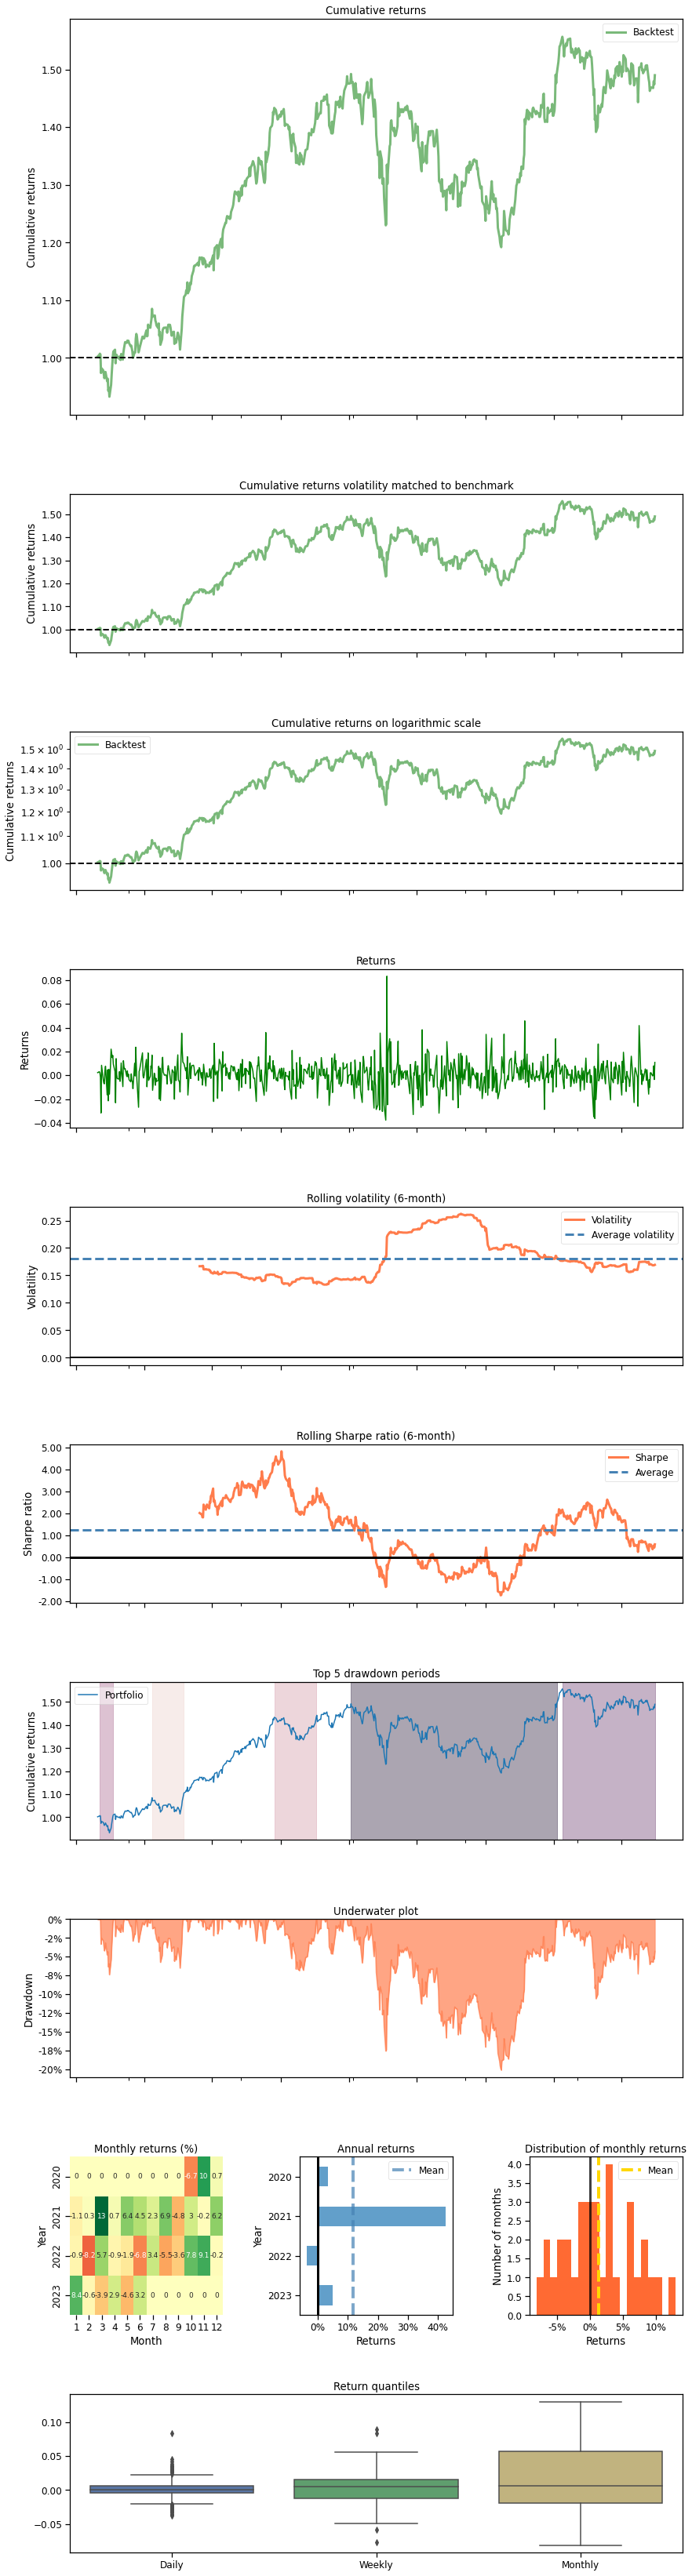

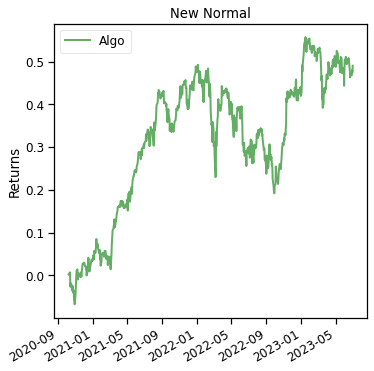

In [38]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = return_stocks_min_vol_2, set_context=False)

Text(0.5, 0, 'Time (Years-Months)')

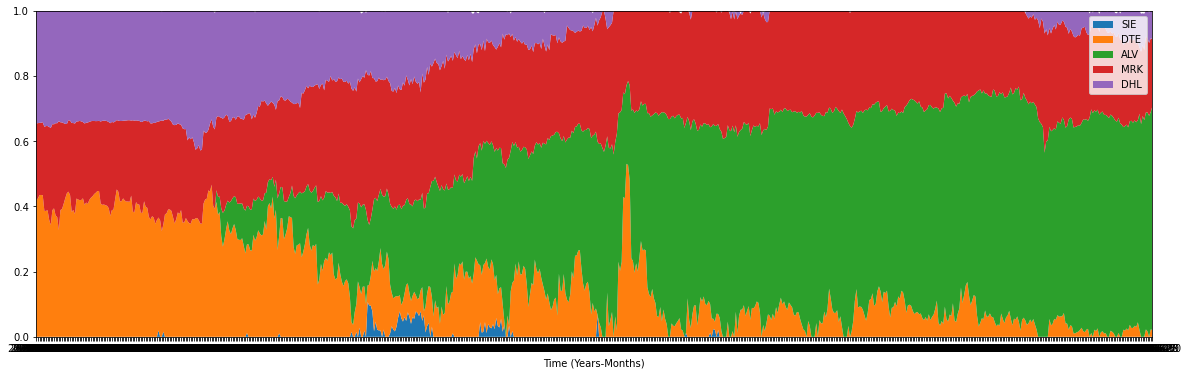

In [39]:
df_plot = pd.DataFrame (portfolio_weights_min_vol_2, index = test.index, columns = tickers)
plt.figure(figsize=(20, 6))  # Set the figure size
plt.stackplot(test.index, df_plot['SIE'], df_plot['DTE'], df_plot['ALV'], df_plot['MRK'], df_plot['DHL'], labels=tickers)
plt.legend(loc='upper right')
plt.margins(x=0)
plt.margins(y=0)
plt.xlabel("Time (Years-Months)")

In [40]:
df_plot

,SIE,DTE,ALV,MRK,DHL
Date,,,,,
2020-10-09,0.0,0.41944,0.00000,0.23485,0.34571
2020-10-12,0.0,0.42413,0.00000,0.23097,0.34490
2020-10-13,0.0,0.43482,0.00000,0.22113,0.34405
2020-10-14,0.0,0.43483,0.00000,0.22152,0.34365
2020-10-15,0.0,0.43410,0.00000,0.22371,0.34219
...,...,...,...,...,...
2023-06-26,0.0,0.02270,0.66519,0.23229,0.07981
2023-06-27,0.0,0.01615,0.67172,0.22808,0.08405
2023-06-28,0.0,0.00000,0.67742,0.22332,0.09362


In [41]:
df_plot.to_csv('LSTM_min_vol_2.csv', index=True)

# 2 Less features scenario (1 feature)

In [42]:
df1.head()

,Date,SIE,DTE,ALV,MRK,DHL,Forecasted
0,2010-01-04,39.892437,4.953136,45.519119,26.576839,13.980,N
1,2010-01-05,39.916805,4.911083,45.657921,26.381214,14.000,N
2,2010-01-06,40.063042,4.789590,46.012665,26.364910,14.155,N
3,2010-01-07,40.538315,4.698472,45.483131,26.919188,14.125,N
4,2010-01-08,40.794235,4.724171,45.236355,26.646120,14.460,N


In [43]:
len(df1)

3449

In [44]:
df1.isna().sum()

Date          0
SIE           0
DTE           0
ALV           0
MRK           0
DHL           0
Forecasted    0
dtype: int64

In [45]:
df1.set_index('Date', inplace=True)
df1

,SIE,DTE,ALV,MRK,DHL,Forecasted
Date,,,,,,
2010-01-04,39.892437,4.953136,45.519119,26.576839,13.980000,N
2010-01-05,39.916805,4.911083,45.657921,26.381214,14.000000,N
2010-01-06,40.063042,4.789590,46.012665,26.364910,14.155000,N
2010-01-07,40.538315,4.698472,45.483131,26.919188,14.125000,N
2010-01-08,40.794235,4.724171,45.236355,26.646120,14.460000,N
...,...,...,...,...,...,...
2023-06-26,167.921677,25.142923,203.861145,166.832275,43.135433,Y
2023-06-27,165.978867,25.438316,209.438019,167.705566,43.623661,Y
2023-06-28,166.570953,25.285627,208.096405,167.299622,42.174179,Y


In [46]:
# Split data set to training set and test set
train = df1.loc[:end_date] # this is actual prices
test = df1.loc[test_start_date:] # this is estimated prices which resulted from ML algorithms

In [47]:
test

,SIE,DTE,ALV,MRK,DHL,Forecasted
Date,,,,,,
2020-10-09,98.552742,14.444920,140.611725,124.088409,39.314884,Y
2020-10-12,98.272644,14.542068,141.473007,124.572304,39.584259,Y
2020-10-13,98.294487,14.517660,140.966705,124.334854,38.750683,Y
2020-10-14,98.746552,14.317676,140.674271,124.232826,39.004848,Y
2020-10-15,98.372292,14.236644,141.186020,124.640686,39.012074,Y
...,...,...,...,...,...,...
2023-06-26,167.921677,25.142923,203.861145,166.832275,43.135433,Y
2023-06-27,165.978867,25.438316,209.438019,167.705566,43.623661,Y
2023-06-28,166.570953,25.285627,208.096405,167.299622,42.174179,Y


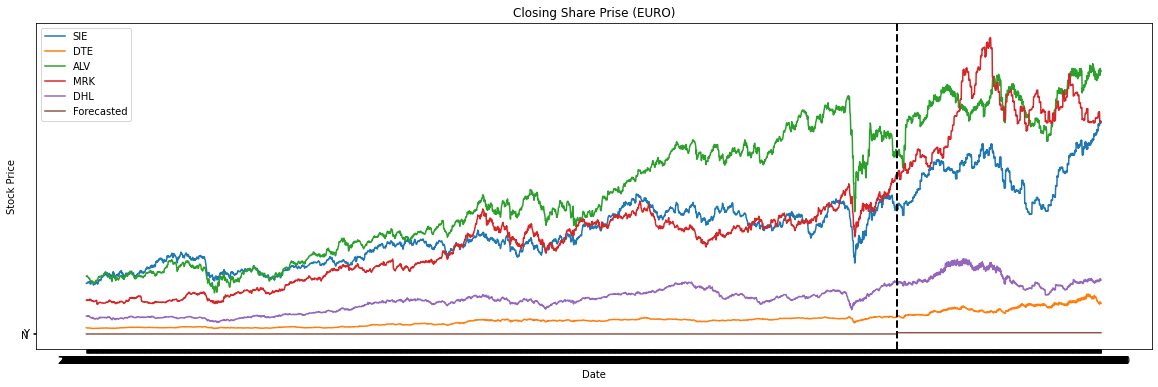

In [48]:
# Plot line chart for each stock
plt.figure(figsize=(20, 6))  # Set the figure size

for column in df1.columns:
    plt.plot(df1.index, df1[column], label=column)

# Add a vertical line at '2020-10-09'
plt.axvline(x='2020-10-09', color='black', linestyle='--', lw=2)

# Configure the plot
plt.title('Closing Share Prise (EURO)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()

# Show the plot
plt.show()

In [49]:
# working days in a year 252
# Prices (include actual and estimated) which is used as input to calculate stock covariance
window = 252
start = len(train)-window
data = df1.iloc[start:]
data = data.reset_index(drop=True)
data = data[['SIE', 'DTE', 'ALV', 'MRK', 'DHL']]

In [50]:
# Forecasted returns which is used as input of optimization algorithm
forecast_returns_df1 = df1[['SIE', 'DTE', 'ALV', 'MRK', 'DHL']].pct_change()
forecast_returns1 = forecast_returns_df1.iloc[start:]
forecast_returns1 = forecast_returns1.reset_index(drop=True)

In [51]:
forecast_returns1

,SIE,DTE,ALV,MRK,DHL
0,0.027360,0.009932,0.028723,0.000482,-0.002648
1,0.000504,0.002588,-0.011262,0.002406,0.002186
2,0.007058,0.014585,0.015662,0.008161,0.000156
3,0.008410,-0.000891,-0.001636,0.009524,-0.004829
4,-0.017871,0.008531,0.007957,0.002830,-0.005949
...,...,...,...,...,...
942,0.020508,0.072141,-0.011668,-0.047206,0.034047
943,-0.011570,0.011749,0.027356,0.005235,0.011318
944,0.003567,-0.006002,-0.006406,-0.002421,-0.033227
945,0.009451,-0.029463,-0.005672,-0.003180,0.013546


## 2.1 Maximize the Sharpe ratio

In [52]:
# Perform Maximum the Sharpe ratio optimization model to calculate weights (Durall, 2022)
portfolio_weights_min_var_1 = np.zeros([test.shape[0], len(tickers)])

idx=0
for i in range(portfolio_weights_min_var_1.shape[0]):    
    sel = data.iloc[i+1:window+i+1]
    
    mu = expected_returns.mean_historical_return(sel)
    S = risk_models.sample_cov(sel)

    # optimize for max sharpe ratio
    ef = EfficientFrontier(mu, S, weight_bounds=(0, 1))
    
    try:
        weights = ef.max_sharpe()
    except:
        weights = ef.nonconvex_objective(
            objective_functions.sharpe_ratio,
            objective_args=(ef.expected_returns, ef.cov_matrix),
            weights_sum_to_one=True)
    weights = ef.clean_weights(cutoff=0.01, rounding=5)
    data.iloc[window+i] = actual_test.iloc[window+i]
    
    portfolio_weights_min_var_1[idx]=np.array([weights[j] for j in tickers])
    idx +=1

Text(0.5, 0, 'Time (Years-Months)')

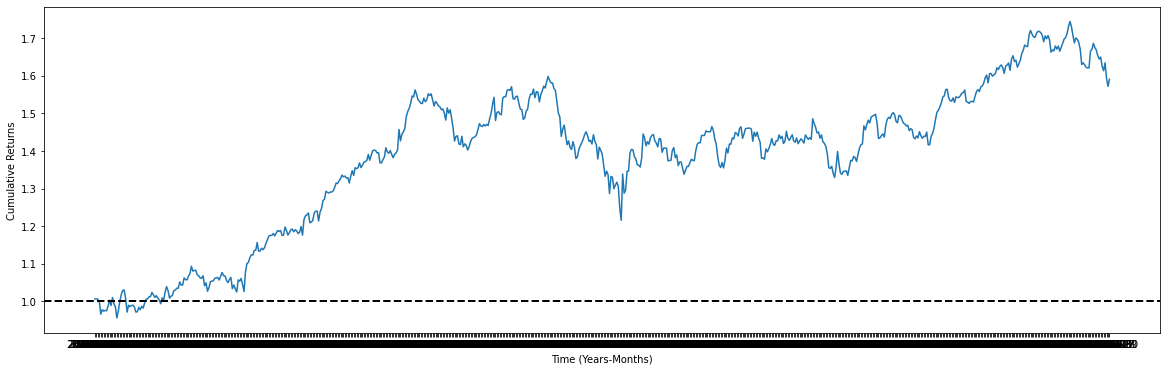

In [53]:
# Calculate porfolio returns from actual returns and resulted weights which is calculated above (Durall, 2022)
return_stocks_min_var_1 = np.sum(actual_returns.multiply(portfolio_weights_min_var_1), axis=1)
cumulative_returns_daily_min_var_1 = (1 + return_stocks_min_var_1).cumprod()
plt.figure(figsize=(20, 6))  # Set the figure size
plt.plot(cumulative_returns_daily_min_var_1)
plt.axhline(1, color='black', linestyle='--', lw=2)
plt.ylabel("Cumulative Returns")
plt.xlabel("Time (Years-Months)")

In [54]:
# Calculate portfolio variance
portfolio_variance_min_var_1 = np.dot(portfolio_weights_min_var_1[-1].T, np.dot(np.cov(actual_returns, rowvar=False), portfolio_weights_min_var_1[-1]))
portfolio_variance_min_var_1

0.00032184918275586846

In [55]:
# Calculate standard deviation
std_min_var_1 = np.sqrt(portfolio_variance_min_var_1)
std_min_var_1

0.017940155594527836

In [56]:
# Calculate porfolio returns
cumulative_returns_daily_min_var_1[-1]

1.591103653044746

In [57]:
# Check negative weights
np.any(portfolio_weights_min_var_1 < 0)

False

In [58]:
return_stocks_min_var_1.index = pd.to_datetime(return_stocks_min_var_1.index)

Start date,2020-10-09
End date,2023-06-30
Total months,33
,Backtest
Annual return,18.341%
Cumulative returns,59.11%
Annual volatility,19.718%
Sharpe ratio,0.95
Calmar ratio,0.77
Stability,0.67
Max drawdown,-23.962%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,23.96,2021-12-28,2022-03-08,2023-02-23,303
1,10.26,2021-08-20,2021-10-11,2021-11-18,65
2,9.91,2023-05-19,2023-06-29,NaT,NaN
3,6.27,2021-01-14,2021-02-26,2021-03-09,39
4,5.71,2020-11-06,2020-11-10,2020-12-17,30


Stress Events,mean,min,max
New Normal,0.07%,-4.39%,10.12%


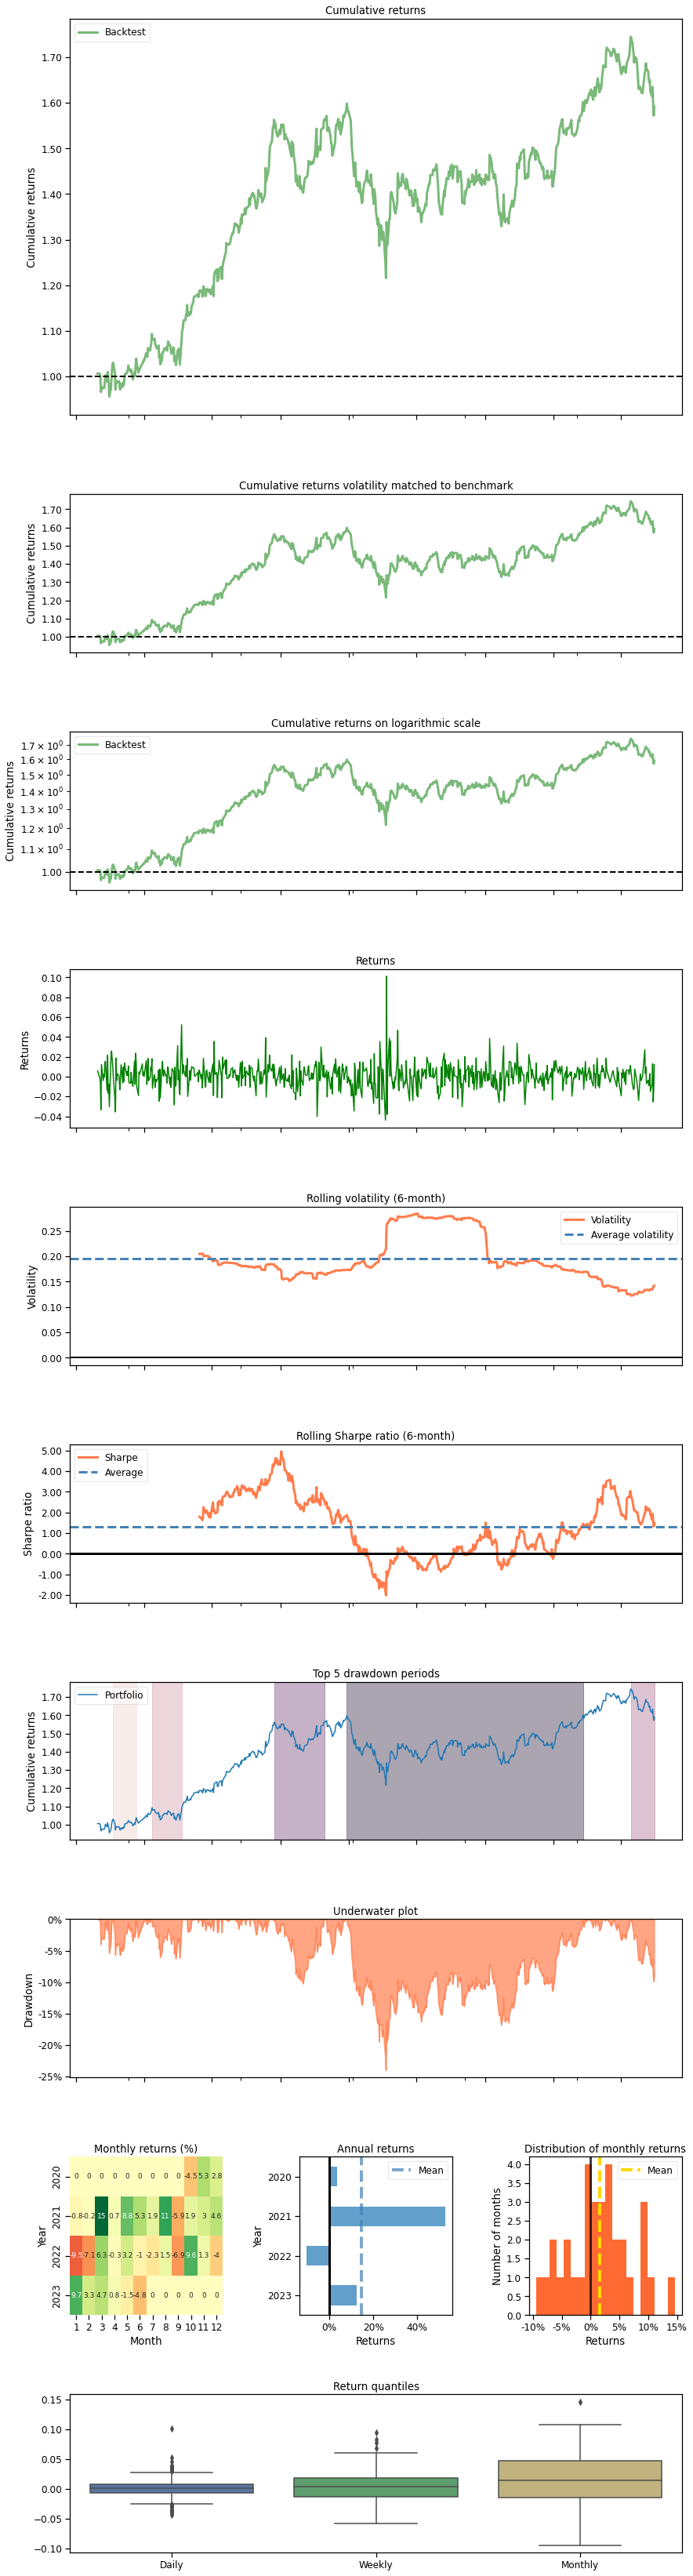

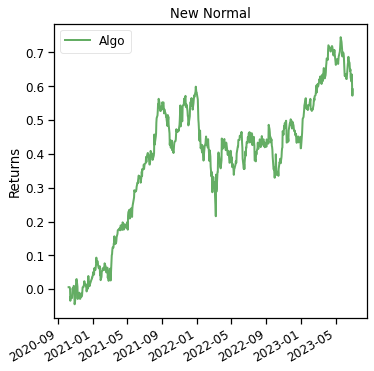

In [59]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = return_stocks_min_var_1, set_context=False)

Text(0.5, 0, 'Time (Years-Months)')

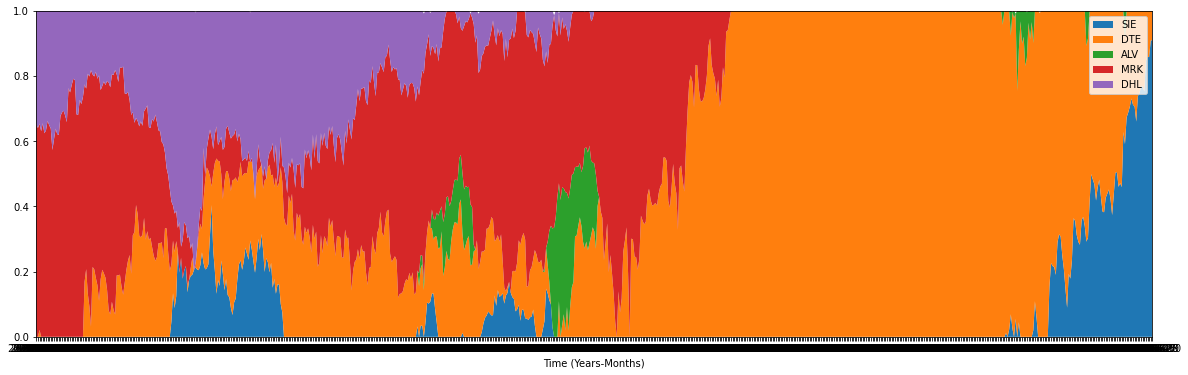

In [60]:
df_plot = pd.DataFrame (portfolio_weights_min_var_1, index = test.index, columns = tickers)
plt.figure(figsize=(20, 6))  # Set the figure size
plt.stackplot(test.index, df_plot['SIE'], df_plot['DTE'], df_plot['ALV'], df_plot['MRK'], df_plot['DHL'], labels=tickers)
plt.legend(loc='upper right')
plt.margins(x=0)
plt.margins(y=0)
plt.xlabel("Time (Years-Months)")

In [61]:
df_plot

,SIE,DTE,ALV,MRK,DHL
Date,,,,,
2020-10-09,0.00000,0.00000,0.0,0.65143,0.34729
2020-10-12,0.00000,0.00000,0.0,0.64019,0.35981
2020-10-13,0.00000,0.02118,0.0,0.63255,0.34627
2020-10-14,0.00000,0.00000,0.0,0.63048,0.36952
2020-10-15,0.00000,0.00000,0.0,0.65487,0.34513
...,...,...,...,...,...
2023-06-26,0.84649,0.15351,0.0,0.00000,0.00000
2023-06-27,0.85917,0.14083,0.0,0.00000,0.00000
2023-06-28,0.85736,0.14264,0.0,0.00000,0.00000


In [62]:
df_plot.to_csv('LSTM_min_var_1.csv', index=True)

# 3 More features scenario (3 features)

In [63]:
df3.head()

,Date,SIE,DTE,ALV,MRK,DHL,Forecasted
0,2010-01-04,39.892437,4.953136,45.519119,26.576839,13.980,N
1,2010-01-05,39.916805,4.911083,45.657921,26.381214,14.000,N
2,2010-01-06,40.063042,4.789590,46.012665,26.364910,14.155,N
3,2010-01-07,40.538315,4.698472,45.483131,26.919188,14.125,N
4,2010-01-08,40.794235,4.724171,45.236355,26.646120,14.460,N


In [64]:
len(df3)

3449

In [65]:
df3.isna().sum()

Date          0
SIE           0
DTE           0
ALV           0
MRK           0
DHL           0
Forecasted    0
dtype: int64

In [66]:
df3.set_index('Date', inplace=True)
df3

,SIE,DTE,ALV,MRK,DHL,Forecasted
Date,,,,,,
2010-01-04,39.892437,4.953136,45.519119,26.576839,13.980000,N
2010-01-05,39.916805,4.911083,45.657921,26.381214,14.000000,N
2010-01-06,40.063042,4.789590,46.012665,26.364910,14.155000,N
2010-01-07,40.538315,4.698472,45.483131,26.919188,14.125000,N
2010-01-08,40.794235,4.724171,45.236355,26.646120,14.460000,N
...,...,...,...,...,...,...
2023-06-26,162.862976,36.315617,204.726959,151.868591,47.543961,Y
2023-06-27,160.656967,37.594303,207.693985,148.313141,46.161736,Y
2023-06-28,162.757492,37.063148,206.646469,143.323944,47.245037,Y


In [67]:
# Split data set to training set and test set
train = df3.loc[:end_date] # this is actual prices
test = df3.loc[test_start_date:] # this is estimated prices which resulted from ML algorithms

In [68]:
test

,SIE,DTE,ALV,MRK,DHL,Forecasted
Date,,,,,,
2020-10-09,98.008797,13.926499,141.831024,119.911774,38.500057,Y
2020-10-12,97.680115,13.756289,141.415482,119.614937,38.855515,Y
2020-10-13,98.243057,14.156539,140.961792,117.441101,38.726570,Y
2020-10-14,97.171494,14.019782,142.385605,118.841522,38.541954,Y
2020-10-15,96.614372,14.083917,141.839264,119.607071,38.650379,Y
...,...,...,...,...,...,...
2023-06-26,162.862976,36.315617,204.726959,151.868591,47.543961,Y
2023-06-27,160.656967,37.594303,207.693985,148.313141,46.161736,Y
2023-06-28,162.757492,37.063148,206.646469,143.323944,47.245037,Y


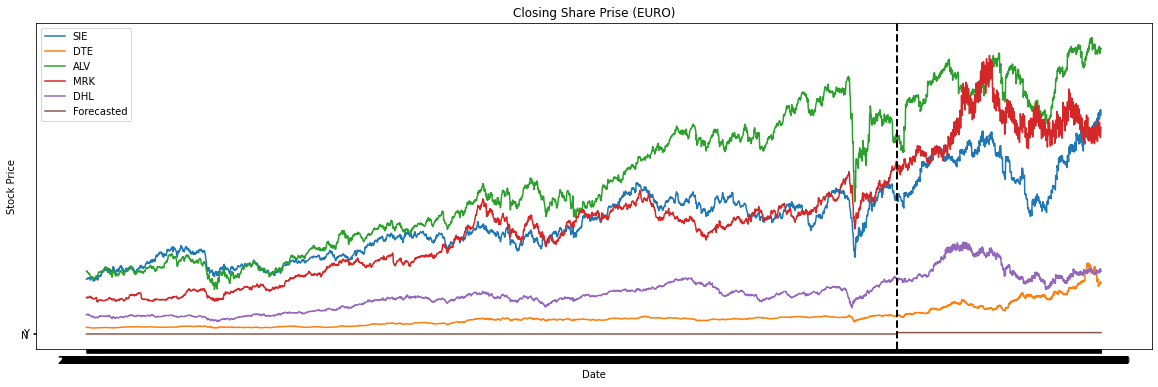

In [69]:
# Plot line chart for each stock
plt.figure(figsize=(20, 6))  # Set the figure size

for column in df3.columns:
    plt.plot(df3.index, df3[column], label=column)

# Add a vertical line at '2020-10-09'
plt.axvline(x='2020-10-09', color='black', linestyle='--', lw=2)

# Configure the plot
plt.title('Closing Share Prise (EURO)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()

# Show the plot
plt.show()

In [70]:
# working days in a year 252
# Prices (include actual and estimated) which is used as input to calculate stock covariance
window = 252
start = len(train)-window
data = df3.iloc[start:]
data = data.reset_index(drop=True)
data = data[['SIE', 'DTE', 'ALV', 'MRK', 'DHL']]

In [71]:
# Forecasted returns which is used as input of optimization algorithm
forecast_returns_df3 = df3[['SIE', 'DTE', 'ALV', 'MRK', 'DHL']].pct_change()
forecast_returns3 = forecast_returns_df3.iloc[start:]
forecast_returns3 = forecast_returns3.reset_index(drop=True)

In [72]:
forecast_returns3

,SIE,DTE,ALV,MRK,DHL
0,0.027360,0.009932,0.028723,0.000482,-0.002648
1,0.000504,0.002588,-0.011262,0.002406,0.002186
2,0.007058,0.014585,0.015662,0.008161,0.000156
3,0.008410,-0.000891,-0.001636,0.009524,-0.004829
4,-0.017871,0.008531,0.007957,0.002830,-0.005949
...,...,...,...,...,...
942,0.037638,0.007709,-0.019220,-0.016091,0.066548
943,-0.013545,0.035210,0.014493,-0.023411,-0.029073
944,0.013075,-0.014129,-0.005044,-0.033640,0.023468
945,0.005805,0.028156,0.009789,0.041572,-0.011748


## 3.1 Maximize the Sharpe ratio

In [73]:
# Perform Maximum the Sharpe ratio optimization model to calculate weights (Durall, 2022)
portfolio_weights_min_var_3 = np.zeros([test.shape[0], len(tickers)])

idx=0
for i in range(portfolio_weights_min_var_3.shape[0]):    
    sel = data.iloc[i+1:window+i+1]
    
    mu = expected_returns.mean_historical_return(sel)
    S = risk_models.sample_cov(sel)

    # optimize for max sharpe ratio
    ef = EfficientFrontier(mu, S, weight_bounds=(0, 1))
    
    try:
        weights = ef.max_sharpe()
    except:
        weights = ef.nonconvex_objective(
            objective_functions.sharpe_ratio,
            objective_args=(ef.expected_returns, ef.cov_matrix),
            weights_sum_to_one=True)
    weights = ef.clean_weights(cutoff=0.01, rounding=5)
    data.iloc[window+i] = actual_test.iloc[window+i]

    portfolio_weights_min_var_3[idx]=np.array([weights[j] for j in tickers])
    idx +=1

Text(0.5, 0, 'Time (Years-Months)')

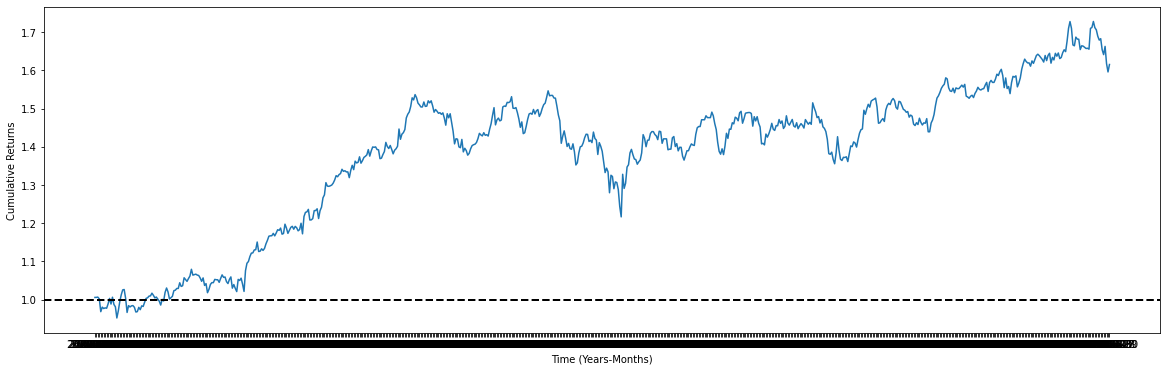

In [74]:
# Calculate porfolio returns from actual returns and resulted weights which is calculated above (Durall, 2022)
return_stocks_min_var_3 = np.sum(actual_returns.multiply(portfolio_weights_min_var_3), axis=1)
cumulative_returns_daily_min_var_3 = (1 + return_stocks_min_var_3).cumprod()
plt.figure(figsize=(20, 6))  # Set the figure size
plt.plot(cumulative_returns_daily_min_var_3)
plt.axhline(1, color='black', linestyle='--', lw=2)
plt.ylabel("Cumulative Returns")
plt.xlabel("Time (Years-Months)")

In [75]:
# Calculate portfolio variance
portfolio_variance_min_var_3 = np.dot(portfolio_weights_min_var_3[-1].T, np.dot(np.cov(actual_returns, rowvar=False), portfolio_weights_min_var_3[-1]))
portfolio_variance_min_var_3

0.00032881612215663534

In [76]:
# Calculate standard deviation
std_min_var_3 = np.sqrt(portfolio_variance_min_var_3)
std_min_var_3

0.018133287681957603

In [77]:
# Calculate porfolio returns
cumulative_returns_daily_min_var_3[-1]

1.6155436407577393

In [78]:
# Check negative weights
np.any(portfolio_weights_min_var_3 < 0)

False

In [79]:
return_stocks_min_var_3.index = pd.to_datetime(return_stocks_min_var_3.index)

Start date,2020-10-09
End date,2023-06-30
Total months,33
,Backtest
Annual return,18.997%
Cumulative returns,61.554%
Annual volatility,19.181%
Sharpe ratio,1.00
Calmar ratio,0.89
Stability,0.72
Max drawdown,-21.33%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,21.33,2021-12-28,2022-03-08,2023-01-11,272
1,10.31,2021-08-20,2021-10-11,2021-12-28,93
2,7.64,2023-06-15,2023-06-29,NaT,NaN
3,5.84,2020-11-06,2020-11-10,2020-12-17,30
4,5.68,2021-01-14,2021-01-29,2021-03-09,39


Stress Events,mean,min,max
New Normal,0.08%,-4.10%,9.16%


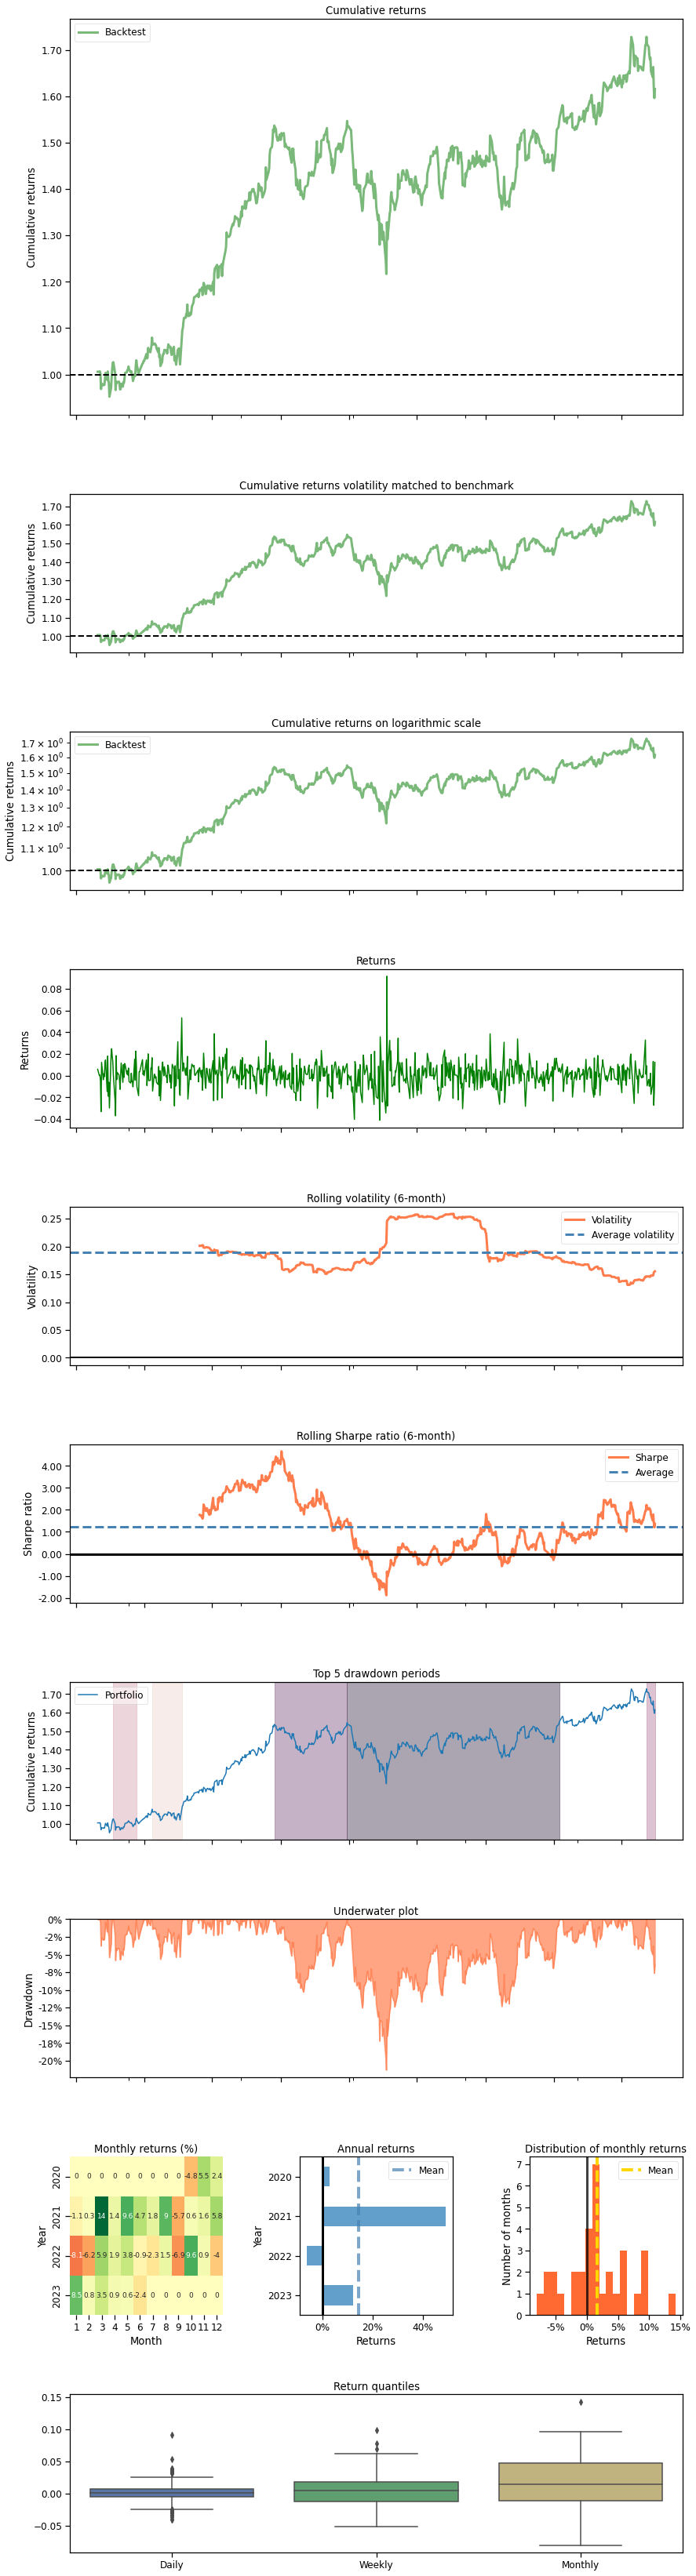

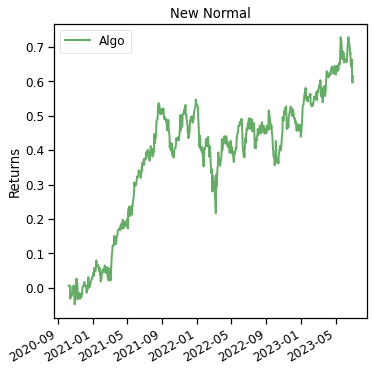

In [80]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = return_stocks_min_var_3, set_context=False)

Text(0.5, 0, 'Time (Years-Months)')

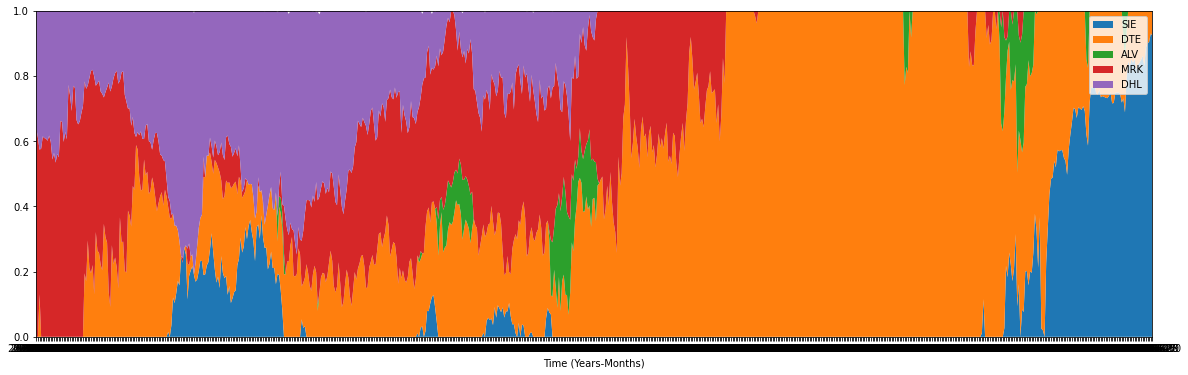

In [81]:
df_plot = pd.DataFrame (portfolio_weights_min_var_3, index = test.index, columns = tickers)
plt.figure(figsize=(20, 6))  # Set the figure size
plt.stackplot(test.index, df_plot['SIE'], df_plot['DTE'], df_plot['ALV'], df_plot['MRK'], df_plot['DHL'], labels=tickers)
plt.legend(loc='upper right')
plt.margins(x=0)
plt.margins(y=0)
plt.xlabel("Time (Years-Months)")

In [82]:
df_plot

,SIE,DTE,ALV,MRK,DHL
Date,,,,,
2020-10-09,0.00000,0.00000,0.0,0.64010,0.35990
2020-10-12,0.00000,0.00000,0.0,0.61015,0.38985
2020-10-13,0.00000,0.13007,0.0,0.44357,0.42636
2020-10-14,0.00000,0.00000,0.0,0.57702,0.42298
2020-10-15,0.00000,0.00000,0.0,0.61446,0.38554
...,...,...,...,...,...
2023-06-26,0.88740,0.11260,0.0,0.00000,0.00000
2023-06-27,0.89969,0.10031,0.0,0.00000,0.00000
2023-06-28,0.90409,0.09591,0.0,0.00000,0.00000


In [83]:
df_plot.to_csv('LSTM_min_var_3.csv', index=True)

# 4 Summary

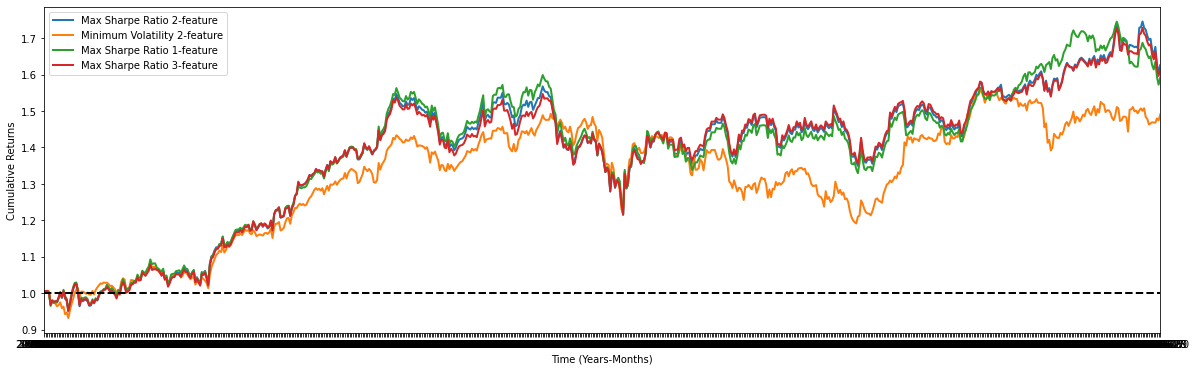

In [84]:
# Plotting all cumulative returns together
x = cumulative_returns_daily_min_var_3.index.values
plt.figure(figsize=(20, 6))  # Set the figure size
plt.plot(x, cumulative_returns_daily_min_var_2, color='tab:blue', label="Max Sharpe Ratio 2-feature", linewidth =2.0)
plt.plot(x, cumulative_returns_daily_min_vol_2, color='tab:orange', label="Minimum Volatility 2-feature", linewidth =2.0)
plt.plot(x, cumulative_returns_daily_min_var_1, color='tab:green', label="Max Sharpe Ratio 1-feature", linewidth =2.0)
plt.plot(x, cumulative_returns_daily_min_var_3, color='tab:red', label="Max Sharpe Ratio 3-feature", linewidth =2.0)
plt.axhline(1, color='black', linestyle='--', linewidth =2.0)
plt.margins(x=0)
plt.ylabel("Cumulative Returns")
plt.xlabel("Time (Years-Months)")
plt.legend()

# Bibliography

- Durall, R. (2022). Asset allocation: From markowitz to deep reinforcement learning. _arXiv preprint arXiv:2208.07158._